IoT tabanlı risk izleme sistemi aracılığıyla Bangladeş'in kırsal bölgelerindeki farklı hastanelerden, 
toplum kliniklerinden ve anne sağlığı hizmetlerinden veriler toplandı.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV

In [2]:
data = pd.read_csv("Maternal Health Risk Data Set.csv")
data.head()   # ilk 5 veri

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [3]:
df = data.copy() ## Ana veriyi bozmamak için veri setini kopyalıyorum.

### Veri seti ile ilgili bilgiler
* Age --> Bir kadının hamile olduğu yıl cinsinden herhangi bir yaş.
* SystolicBP --> Kan Basıncının mmHg("milimetre cıva") cinsinden üst değeri, hamilelik sırasındaki bir diğer önemli özelliktir.
* DiastolicBP --> Kan Basıncının mmHg("milimetre cıva") cinsinden daha düşük değeri, hamilelik sırasındaki bir diğer önemli özelliktir.
* BS --> Kan şekeri seviyeleri molar konsantrasyon cinsindendir.    (mmol/L)
* BodyTemp --> Vücut Sıcaklığı   (F-->Fahrenheit)
* HeartRate --> Normal bir dinlenme kalp atış hızı  (bpm)
* RiskLevel --> Önceki nitelik dikkate alınarak hamilelik sırasında Tahmin Edilen Risk Yoğunluğu Düzeyi.

#### Sistolik Kan basıncı
Kanın damar içine pompalanma olayı damarlardaki basıncın artmasına neden olur. 
Kalbin kasılması sırasında ulaşılan en yüksek kan basıncına “sistolik kan basıncı” denir.
Hipertansiyon hastalarında büyük tansiyon 140 mmHg altında, 
küçük tansiyon ise 90 mmHg altında olmalıdır.
Kalbin kanı vücuda pompaladığı ya da farklı bir deyişle kalbin kasıldığı sırada kan damarlarında oluşan basınç en yüksek seviyede olur. Bu basınç türü sistolik kan basıncı olarak tanımlanır. Halk arasında büyük tansiyon olarak da bilinen sistolik kan basıncı değerinin ortalama olarak 120 ila 130 mmHg aralığında olması beklenir. Bu aralık, kan basıncı seviyesinin kişiden kişiye göre farklılık göstermesinden kaynaklanır. Farklı sağlık problemlerinin varlığında ya da yaşın artmasıyla birlikte damarlar esnekliğini kaybedebilir. Bu durumda kişinin kan basınç değeri yüksek olur.

#### Diyastolik Kan Basıncı
Kalp, gün içinde ortalama 100 bin kez atarak sürekli olarak vücuda kan pompalar.
Kalbin kasıldığı sırada oluşan sistolik kan basıncına ek olarak kalbin her iki atımı arasında da damarlarda bir miktar basınç bulunur.
Kalbin kasılmasıyla oluşan kan basıncının etkisiyle genişleyen damarlar, kalbin atım aralığı sırasında kana basınç uygulayarak kan akımının devam etmesini sağlar.
Damarlarda bulunan bu basınç, diyastolik kan basıncı ya da halk arasında yaygın olarak bilinen adıyla küçük tansiyon olarak bilinir.
Diyastolik kan basıncının 70 ila 90 mmHg aralığında olması normal kabul edilir.

In [4]:
data.info()  #Sütun veri tipleri ve toplam veri sayısı hakkında vs. bilgi verir.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [5]:
data.describe().T  # Descriptive statistics

,count,mean,std,min,25%,50%,75%,max
Age,1014.0,29.871795,13.474386,10.0,19.0,26.0,39.0,70.0
SystolicBP,1014.0,113.198225,18.403913,70.0,100.0,120.0,120.0,160.0
DiastolicBP,1014.0,76.460552,13.885796,49.0,65.0,80.0,90.0,100.0
BS,1014.0,8.725986,3.293532,6.0,6.9,7.5,8.0,19.0
BodyTemp,1014.0,98.665089,1.371384,98.0,98.0,98.0,98.0,103.0
HeartRate,1014.0,74.301775,8.088702,7.0,70.0,76.0,80.0,90.0


In [6]:
data.isna().sum()  # Boş değer var mı?

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [7]:
RiskLevel = {'low risk':1, 
        'mid risk':2, 
        'high risk':3}

# apply using map
df['RiskLevel'] = df['RiskLevel'].map(RiskLevel).astype(float)
df

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,3.0
1,35,140,90,13.0,98.0,70,3.0
2,29,90,70,8.0,100.0,80,3.0
3,30,140,85,7.0,98.0,70,3.0
4,35,120,60,6.1,98.0,76,1.0
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,3.0
1010,55,120,90,18.0,98.0,60,3.0
1011,35,85,60,19.0,98.0,86,3.0
1012,43,120,90,18.0,98.0,70,3.0


In [8]:
data.nunique()  # Tekrarlayan değer

Age            50
SystolicBP     19
DiastolicBP    16
BS             29
BodyTemp        8
HeartRate      16
RiskLevel       3
dtype: int64

In [9]:
data["Age"].unique()  # Herhangi bir sütuna ait unique değerler.

array([25, 35, 29, 30, 23, 32, 42, 19, 20, 48, 15, 50, 10, 40, 21, 18, 16,
       22, 49, 28, 12, 60, 55, 45, 31, 17, 26, 54, 44, 33, 13, 34, 38, 39,
       63, 14, 37, 51, 62, 43, 65, 66, 56, 70, 27, 36, 59, 24, 41, 46],
      dtype=int64)

In [10]:
data["SystolicBP"].unique()

array([130, 140,  90, 120,  85, 110,  70, 100,  75,  95,  76,  80, 115,
       135, 160, 129,  83,  99,  78], dtype=int64)

In [11]:
data["DiastolicBP"].unique()

array([ 80,  90,  70,  85,  60,  89,  75, 100,  50,  65,  95,  49,  63,
        69,  76,  68], dtype=int64)

In [12]:
data["BS"].unique()

array([15.  , 13.  ,  8.  ,  7.  ,  6.1 ,  7.01, 11.  ,  6.9 , 18.  ,
        6.7 ,  7.5 ,  7.2 ,  7.1 ,  6.4 ,  9.  ,  6.  ,  7.7 , 12.  ,
       16.  ,  7.8 ,  6.8 ,  7.9 , 17.  , 19.  , 10.  ,  6.3 ,  6.6 ,
        6.5 ,  7.6 ])

In [13]:
data["BodyTemp"].unique()

array([ 98. , 100. , 102. , 101. , 103. ,  98.4,  99. ,  98.6])

In [14]:
data["HeartRate"].unique()

array([86, 70, 80, 76, 78, 77, 88, 90, 66, 82, 60, 75, 67, 65, 68,  7],
      dtype=int64)

In [15]:
data["RiskLevel"].unique()

array(['high risk', 'low risk', 'mid risk'], dtype=object)

In [16]:
data.duplicated().sum()   # Tekrarlanan toplam kaç veri var.

562

### Data Visualization

In [17]:
data

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


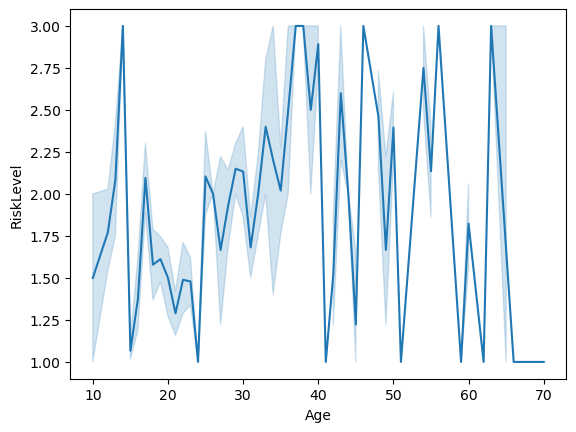

In [18]:
sns.lineplot(data=df,x="Age",y="RiskLevel");  # grafik daha yorumlanabilir olsun diye düzenlediğim "df" kullandım.

In [19]:
np.sort(data["Age"].unique())  # Grafikte 10,12,13 Yaşında Anne olanlar vardı.İncelemek için sıraladım.

array([10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
       28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44,
       45, 46, 48, 49, 50, 51, 54, 55, 56, 59, 60, 62, 63, 65, 66, 70],
      dtype=int64)

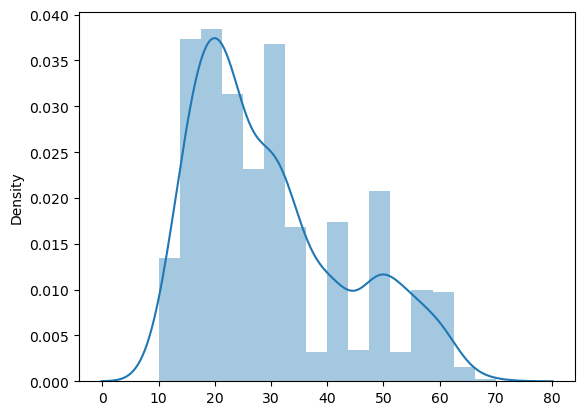

In [20]:
sns.distplot(x=df["Age"]); #Yaş 20-22 arası yoğunluk fazla

In [81]:
df.Age.value_counts()

23    71
19    67
17    63
15    60
35    50
25    48
32    48
22    45
50    43
29    40
21    38
40    37
55    37
12    35
60    34
30    30
28    28
48    26
42    23
20    22
31    22
18    19
16    16
54    12
13    12
27     9
49     9
45     9
37     6
33     5
34     5
43     5
10     4
36     4
39     4
24     3
65     3
44     3
14     3
26     3
63     2
38     2
59     2
62     1
51     1
66     1
56     1
70     1
41     1
46     1
Name: Age, dtype: int64

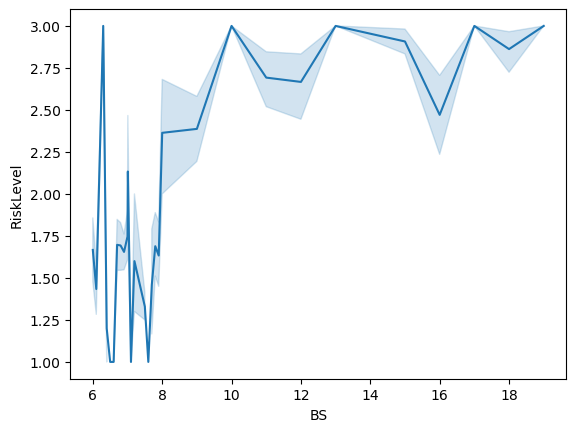

In [21]:
sns.lineplot(data=df,x="BS",y="RiskLevel");  #Kan şekeri yükseldikçe Risk seviyesi artıyor.

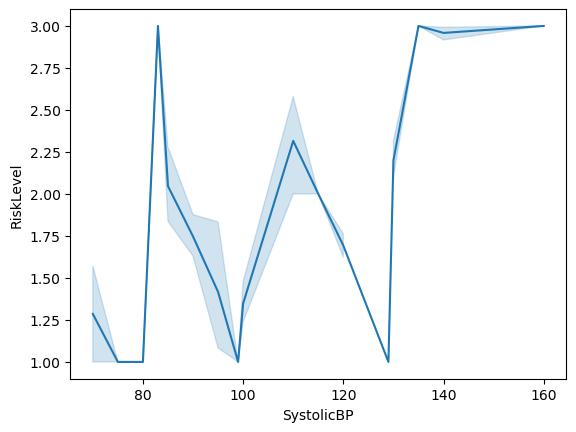

In [22]:
sns.lineplot(data=df,x="SystolicBP",y="RiskLevel");

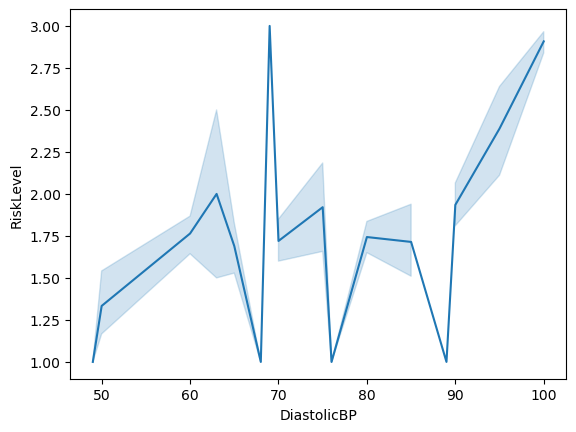

In [23]:
sns.lineplot(data=df,x="DiastolicBP",y="RiskLevel");

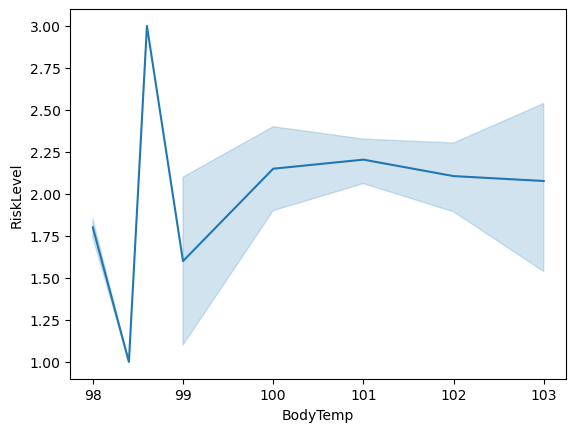

In [24]:
sns.lineplot(data=df,x="BodyTemp",y="RiskLevel");

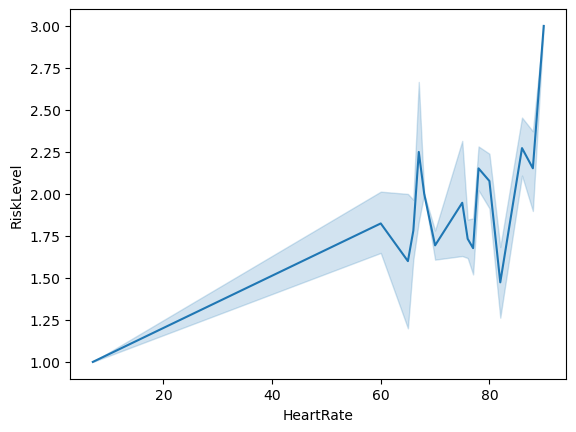

In [25]:
sns.lineplot(data=df,x="HeartRate",y="RiskLevel");  # Neredeyse Doğrusal bir artış var

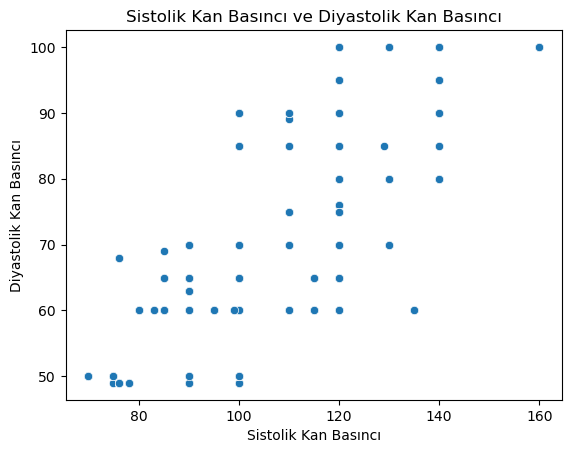

In [62]:
sns.scatterplot(data=df, x="SystolicBP", y="DiastolicBP")
plt.xlabel("Sistolik Kan Basıncı")
plt.ylabel("Diyastolik Kan Basıncı")
plt.title("Sistolik Kan Basıncı ve Diyastolik Kan Basıncı");

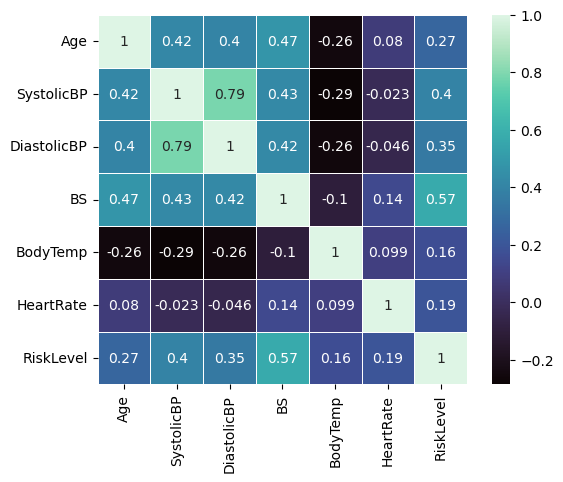

In [26]:
sns.heatmap(data=df.corr(),
            annot=True,
            linewidths=0.7,
            linecolor="white",
            cbar=True,
            square=True,
            cmap="mako");

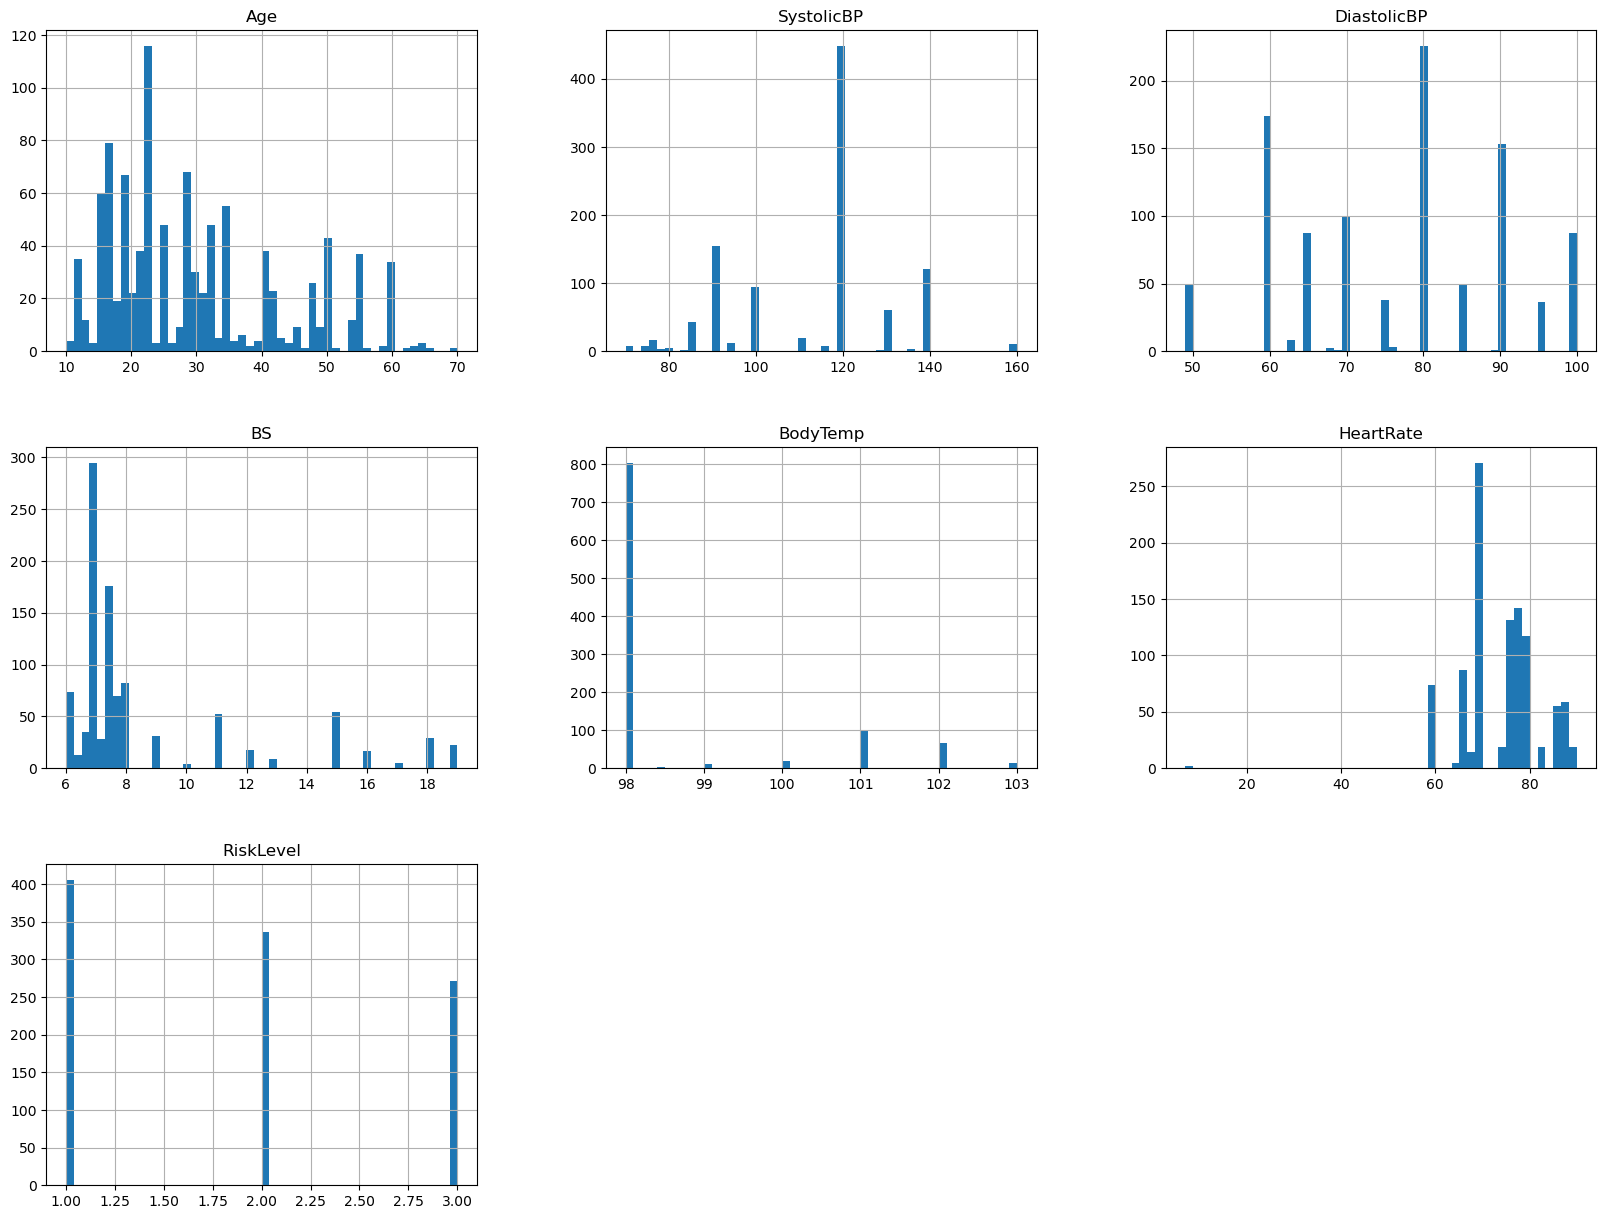

In [27]:
df.hist(bins=50, figsize=(20, 15));
plt.show()

In [80]:
data["RiskLevel"].value_counts()

low risk     406
mid risk     336
high risk    272
Name: RiskLevel, dtype: int64

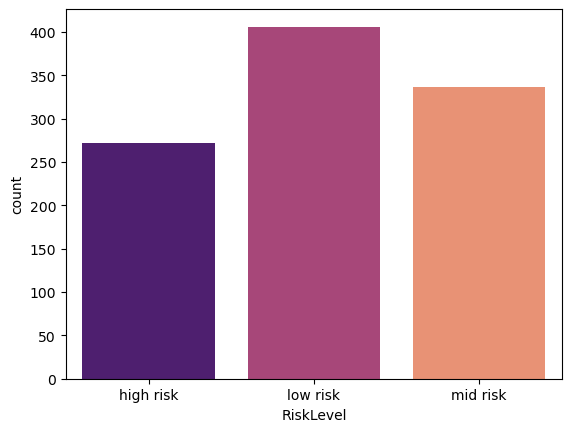

In [69]:
sns.countplot(data=data,x="RiskLevel",palette="magma");

### Modelling

In [29]:
from sklearn.model_selection import train_test_split



from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


from sklearn.metrics import f1_score,accuracy_score,recall_score,precision_score

In [30]:
X = data.drop("RiskLevel",axis=1)
y = data["RiskLevel"]
X.shape, y.shape

((1014, 6), (1014,))

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((709, 6), (305, 6), (709,), (305,))

### Model 1 : SVC

In [32]:
##SVC için Standartlaştırma yapalım.
from sklearn.preprocessing import StandardScaler
#StandardScaler

ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

In [33]:
##SVC oluşturma.
from sklearn.svm import SVC

svm = SVC(random_state=0)

# Grid list
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}
#Gridsearchcv obje oluştur.
grid_search_svm = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
# gridsearchcv veriye fitle
grid_search_svm.fit(X_train_ss,y_train)
# en iyi parametreleri ve skoru bas.
print('Best Parameters: ', grid_search_svm.best_params_)
print('Best Accuracy: ', grid_search_svm.best_score_)

# en iyi svm modeli

best_svm = grid_search_svm.best_estimator_

Best Parameters:  {'C': 1000, 'gamma': 1, 'kernel': 'rbf'}
Best Accuracy:  0.8024473079612428


In [34]:
# Modeli en iyi parametrelerle değerlendir
test_accuracy = best_svm.score(X_test_ss, y_test)
print('Test Accuracy: ', test_accuracy)

Test Accuracy:  0.760655737704918


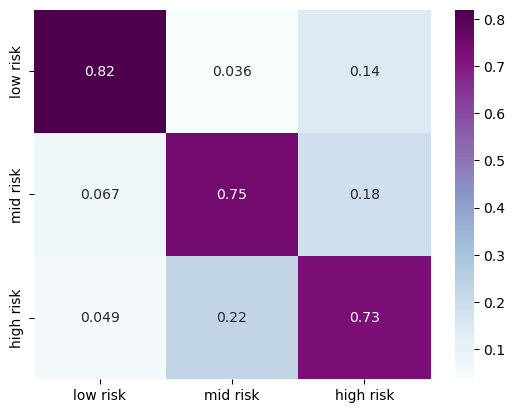

In [35]:
# Confusion matrix görselleştir.
y_pred = best_svm.predict(X_test_ss)

labels = y_test.unique()

cm_logistic = confusion_matrix(y_test, y_pred, normalize='true')
plt.figure()
sns.heatmap(cm_logistic, annot=True, cmap='BuPu', xticklabels=labels, yticklabels=labels)
plt.show()

In [36]:
# classification report
svm_report = classification_report(y_test, y_pred)
print(svm_report)

              precision    recall  f1-score   support

   high risk       0.84      0.82      0.83        83
    low risk       0.77      0.75      0.76       119
    mid risk       0.69      0.73      0.71       103

    accuracy                           0.76       305
   macro avg       0.77      0.77      0.77       305
weighted avg       0.76      0.76      0.76       305



### Model 2 : Decision Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Decision Tree Classifier modeli oluşturma.
tree = DecisionTreeClassifier(random_state=0)

# en iyi parametre için grid oluşturma.
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 4]
}

# GridSearchCV oluştur.Ve hazırladığımız parametreleri ver.
grid_search_tree = GridSearchCV(tree, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# gs veriye fit et
grid_search_tree.fit(X_train, y_train)

# En iyi sonuç veren paramtreler ve accuracy skorunu yazdır.
print('Best Parameters: ', grid_search_tree.best_params_)
print('Best Accuracy: ', grid_search_tree.best_score_)

# en iyi modeli getir.
best_tree = grid_search_tree.best_estimator_

Best Parameters:  {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'best'}
Best Accuracy:  0.7672160623314354


In [38]:
# test verisinde test etme
test_accuracy = best_tree.score(X_test, y_test)
print('Test Accuracy: ', test_accuracy)

Test Accuracy:  0.7147540983606557


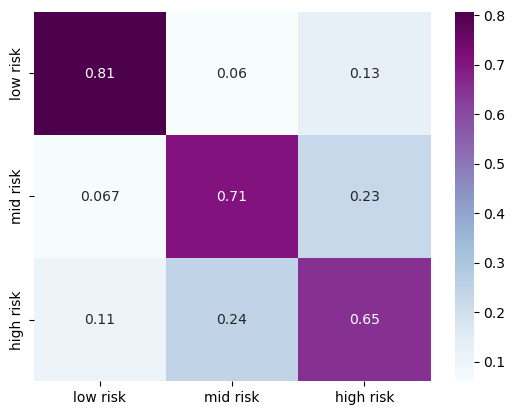

In [39]:
# Confusion matrix i görselleştirme
from sklearn.metrics import confusion_matrix

y_pred = best_tree.predict(X_test)

labels = y_test.unique()

cm_tree = confusion_matrix(y_test, y_pred, normalize='true')
plt.figure()
sns.heatmap(cm_tree, annot=True, cmap='BuPu', xticklabels=labels, yticklabels=labels)
plt.show()

In [40]:
# classification report
from sklearn.metrics import classification_report

tree_report = classification_report(y_test, y_pred)
print(tree_report)

              precision    recall  f1-score   support

   high risk       0.78      0.81      0.79        83
    low risk       0.74      0.71      0.72       119
    mid risk       0.64      0.65      0.64       103

    accuracy                           0.71       305
   macro avg       0.72      0.72      0.72       305
weighted avg       0.71      0.71      0.71       305



### Model 3: Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Classifier model oluşturma
forest = RandomForestClassifier(random_state=0)

# parametre grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 4],
    'max_features': ['sqrt', 'log2']
}

# gridsearchcv oluşturma
grid_search_forest = GridSearchCV(forest, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# gs veriye fit et
grid_search_forest.fit(X_train, y_train)

# # En iyi sonuç veren paramtreler ve accuracy skorunu yazdır.
print('Best Parameters: ', grid_search_forest.best_params_)
print('Best Accuracy: ', grid_search_forest.best_score_)

# en iyi modeli getir.
best_forest = grid_search_forest.best_estimator_

Best Parameters:  {'criterion': 'entropy', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
Best Accuracy:  0.8179902107681549


In [42]:
#test verisinde test etme
test_accuracy = best_forest.score(X_test, y_test)
print('Test Accuracy: ', test_accuracy)

Test Accuracy:  0.7540983606557377


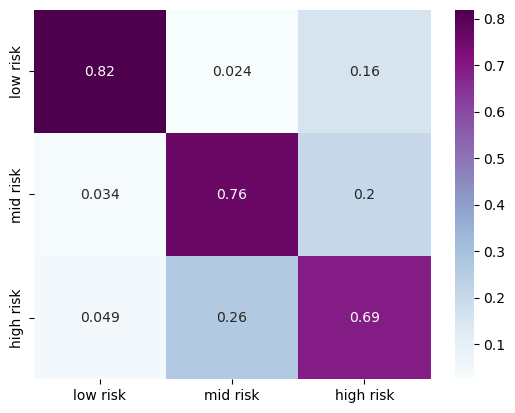

In [43]:
# Confusion matrix görselleştir.
y_pred = best_forest.predict(X_test)

labels = y_test.unique()

cm_forest = confusion_matrix(y_test, y_pred, normalize='true')
plt.figure()
sns.heatmap(cm_forest, annot=True, cmap='BuPu', xticklabels=labels, yticklabels=labels)
plt.show()

In [44]:
# classification report
forest_report = classification_report(y_test, y_pred)
print(forest_report)

              precision    recall  f1-score   support

   high risk       0.88      0.82      0.85        83
    low risk       0.76      0.76      0.76       119
    mid risk       0.66      0.69      0.67       103

    accuracy                           0.75       305
   macro avg       0.77      0.76      0.76       305
weighted avg       0.76      0.75      0.76       305



### Model 4 : MultinomialNB

In [45]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
mNB = clf.fit(X_train,y_train)
y_pred = mNB.predict(X_test)

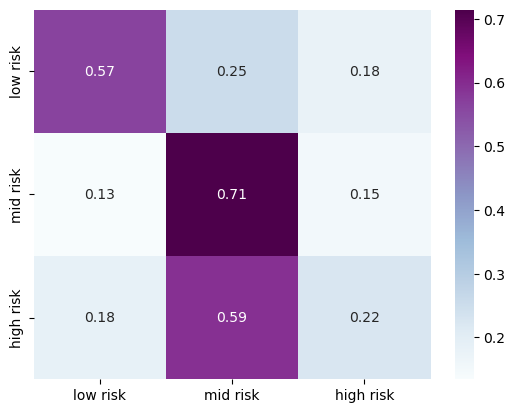

In [46]:
# Confusion matrix görselleştir.
cm_mNB = confusion_matrix(y_test, y_pred, normalize='true')
plt.figure()
labels = y_test.unique()
sns.heatmap(cm_mNB, annot=True, cmap='BuPu', xticklabels=labels, yticklabels=labels)
plt.show()

In [47]:
# classification report
mNB_report = classification_report(y_test, y_pred)
print(mNB_report)

              precision    recall  f1-score   support

   high risk       0.57      0.57      0.57        83
    low risk       0.51      0.71      0.59       119
    mid risk       0.41      0.22      0.29       103

    accuracy                           0.51       305
   macro avg       0.50      0.50      0.48       305
weighted avg       0.49      0.51      0.48       305



### Model 5 : Logistic Regression

In [48]:
# train ve test verisini logistic reg. için ölçeklendirme lazım.
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler üretme
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [49]:
#Modeli kuralım
from sklearn.linear_model import LogisticRegression

# logistic reg. classifier kuralım.
logreg = LogisticRegression(random_state=0, max_iter=2000)

# parametre grid oluşturma
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

# gridsearchcv oluşturma
grid_search_logreg = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# gridsearch'e veriyi fit le
grid_search_logreg.fit(X_train_scaled, y_train)

# en iyi parametreleri ve skoru yazdır.
print('Best Parameters: ', grid_search_logreg.best_params_)
print('Best Accuracy: ', grid_search_logreg.best_score_)

# en iyi modeli getir.
best_logreg = grid_search_logreg.best_estimator_

Best Parameters:  {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Best Accuracy:  0.645959444610928


In [50]:
# veriyi test verisinde test et.
test_accuracy = best_logreg.score(X_test_scaled, y_test)
print('Test Accuracy: ', test_accuracy)

Test Accuracy:  0.6327868852459017


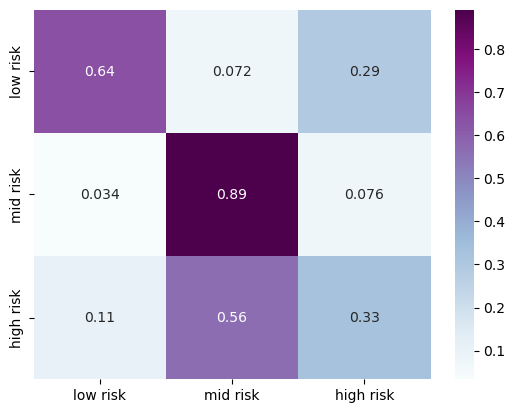

In [51]:
# confusion matrix görselleştirme.
y_pred = best_logreg.predict(X_test_scaled)

labels = y_test.unique()

cm_logistic = confusion_matrix(y_test, y_pred, normalize='true')
plt.figure()
sns.heatmap(cm_logistic, annot=True, cmap='BuPu', xticklabels=labels, yticklabels=labels)
plt.show()

In [52]:
# classification report
logistic_report = classification_report(y_test, y_pred)
print(logistic_report)

              precision    recall  f1-score   support

   high risk       0.78      0.64      0.70        83
    low risk       0.62      0.89      0.73       119
    mid risk       0.51      0.33      0.40       103

    accuracy                           0.63       305
   macro avg       0.64      0.62      0.61       305
weighted avg       0.63      0.63      0.61       305



### ROC , AUC

In [53]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay
from sklearn.preprocessing import label_binarize

In [54]:
classifier = OneVsRestClassifier(LogisticRegression())    # OVR ile logistic regresyon oluşturma.

In [55]:
classifier.fit(X_train,y_train) # clf i veriye fit etmek için

OneVsRestClassifier(estimator=LogisticRegression())

In [56]:
# Sınıfların binarize edilmesi
y_test_bin = label_binarize(y_test, classes=np.unique(y))  #3 sınıf olduğundan 2 ye indirgiyor,y_test i aldı ve classes="y deki low mid high etiketleri aldı."
n_classes = y_test_bin.shape[1]   #y_test_bin den 3 rakamını aldı sadece

In [57]:
# Sınıflandırma skorlarını al
y_score = classifier.predict_proba(X_test)  # Roc curve için probability değerleri lazım.predict_proba parametresini kullanıyoruz.

In [58]:
# ROC eğrisini çiz
fpr = dict()  #boş dict
tpr = dict()  #boş dict
roc_auc = dict()   # boş dict
for i in range(n_classes):   # fpr ,tpr ve roc_auc dict içini doldurmak için, döngü oluşturduk.
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])   # roc_curve 
    roc_auc[i] = auc(fpr[i], tpr[i])

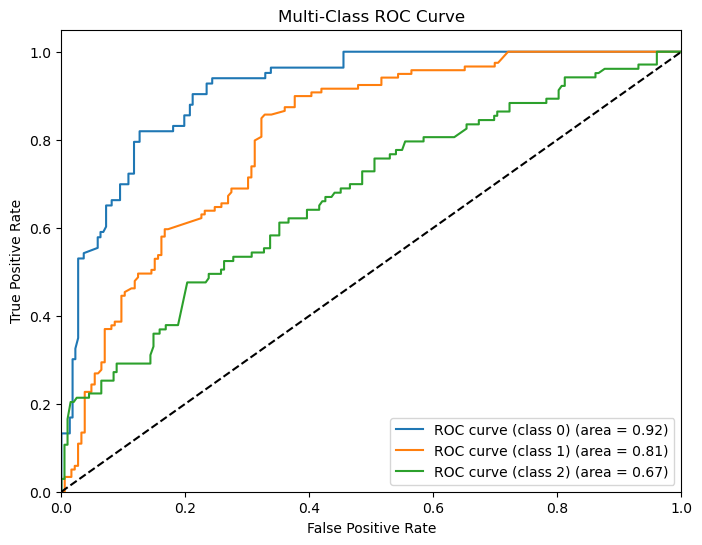

In [59]:
# ROC eğrilerini çiz
plt.figure(figsize=(8, 6)) # 8 e 6 lık boş figure oluştur
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve (class {}) (area = {:.2f})'.format(i, roc_auc[i]))

    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve')
plt.legend(loc="lower right")
plt.show()

low risk     406
mid risk     336
high risk    272
Name: RiskLevel, dtype: int64